Text(0.5, 0, 'Views')

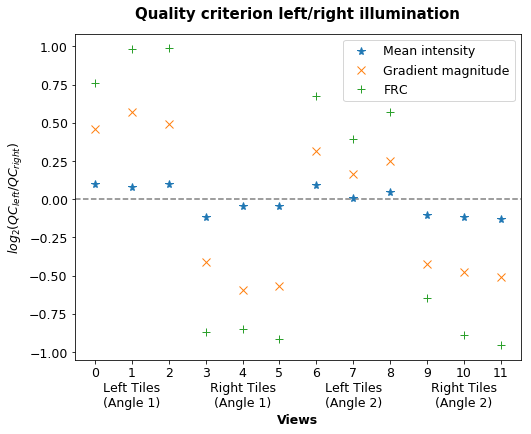

In [72]:
from collections import defaultdict
import re

import numpy as np
from matplotlib import pyplot as plt


def read_log(f):
    p = re.compile('.*?Evaluated.*?setupId=([0-9]*).* (.*)')
    res = dict()
    with open(f, 'r') as fd:
        for line in fd:
            m = p.match(line)
            if m:
                res[m.groups()[0]] = m.groups()[1]
    return res


parse_mean, parse_gm, parse_frc = (
    read_log(f) for f in ['/Users/david/OneDrive/illum_select_performance/mean_illumselect.txt',
                          '/Users/david/OneDrive/illum_select_performance/gm_illumselect.txt',
                         '/Users/david/OneDrive/illum_select_performance/frc_d_illumselect.txt']
)

mean_vals, gm_vals, frc_vals = (np.array([float(m[1]) for m in sorted(res.items(), key=lambda k: int(k[0]))])
                                for res in (parse_mean, parse_gm, parse_frc))

left_a1_idxs = [0,3,4]
right_a1_idxs = [1,2,5]
left_a2_idxs = [idx + 6 for idx in left_a1_idxs]
right_a2_idxs = [idx + 6 for idx in right_a1_idxs]

idx_i1 = left_a1_idxs + right_a1_idxs + left_a2_idxs + right_a2_idxs
idx_i2 = [idx + 12 for idx in idx_i1]

plt.rc('font', size=12.5)
plt.rc('figure', figsize=[8,6])
plt.axhline(color='grey', linestyle='--')
plt.plot(np.log2(mean_vals[idx_i1] / mean_vals[idx_i2]), '*', label='Mean intensity', markersize=8)
plt.plot(np.log2(gm_vals[idx_i1] / gm_vals[idx_i2]), 'x', label='Gradient magnitude', markersize=8)
plt.plot(np.log2(frc_vals[idx_i1] / frc_vals[idx_i2]), '+', label='FRC', markersize=8)
plt.legend()
plt.title('Quality criterion left/right illumination', pad=15, fontweight='bold')

labs = defaultdict(str)
labs[1] = 'Left Tiles\n(Angle 1)'
labs[4] = 'Right Tiles\n(Angle 1)'
labs[7] = 'Left Tiles\n(Angle 2)'
labs[10] = 'Right Tiles\n(Angle 2)'

plt.xticks(np.arange(12), map(lambda i: str(i) + '\n' + labs[i], np.arange(12)), color='black')
plt.ylabel('$log_2(QC_{left}/QC_{right})$')
plt.xlabel('Views', fontweight='bold')



Text(0.5, 0, 'Views')

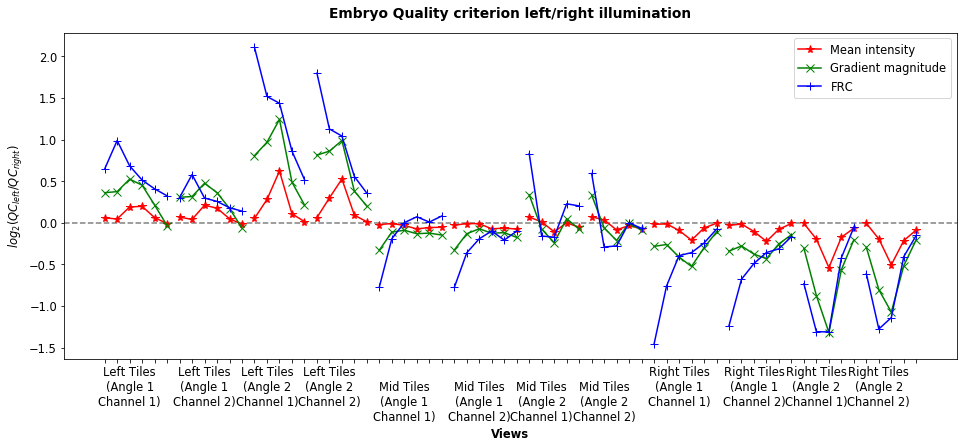

In [2]:
from collections import defaultdict
from itertools import count
import re

import numpy as np
from matplotlib import pyplot as plt


def read_log(f):
    p = re.compile('.*?Evaluated.*?setupId=([0-9]*).* (.*)')
    res = dict()
    with open(f, 'r') as fd:
        for line in fd:
            m = p.match(line)
            if m:
                res[m.groups()[0]] = m.groups()[1]
    return res

parse_mean, parse_gm, parse_frc = (
    read_log(f) for f in ['/Users/david/OneDrive/illum_select_performance/mean_illumselect_embryo.txt',
                          '/Users/david/OneDrive/illum_select_performance/gm_illumselect_embryo.txt',
                          '/Users/david/OneDrive/illum_select_performance/illumselect_embryo_frc.txt']
)

mean_vals, gm_vals, frc_vals = (np.array([float(m[1]) for m in sorted(res.items(), key=lambda k: int(k[0]))])
                                for res in (parse_mean, parse_gm, parse_frc))

idx_left = np.array([0,5,6,11,12,17])
idx_mid = np.array([1,4,7,10,13,16])
idx_right = np.array([2,3,8,9,14,15])

'''
idx_i1 = np.concatenate((idx_left, idx_left[:5]+18, idx_left+33, idx_left[:5]+51,
               idx_mid, idx_mid[:5]+18, idx_mid+33, idx_mid[:5]+51,
               idx_right, idx_right[:5]+18, idx_right+33, idx_right[:5]+51))

#idx_i1 = idx_left[:5]+18
idx_i2 = [idx + 66 for idx in idx_i1]
'''

plt.rc('font', size=11.5)
plt.rc('figure', figsize=[16,6])
plt.axhline(color='grey', linestyle='--')

c = count()
did_draw_label = False
for idxes in (idx_left, idx_mid, idx_right):
    for l, off in [(6,0),(6,33),(5,18),(5,51)]:
        idxes2 = [idx+off + 66 for idx in idxes[:l]]
        xs = [next(c) for _ in range(l)]
        plt.plot(xs, np.log2(mean_vals[idxes[:l]+off] / mean_vals[idxes2]), '*-', label='Mean intensity' if not did_draw_label else None, markersize=8, color='red')
        plt.plot(xs, np.log2(gm_vals[idxes[:l]+off] / gm_vals[idxes2]), 'x-', label='Gradient magnitude'if not did_draw_label else None, markersize=8, color='green')
        plt.plot(xs, np.log2(frc_vals[idxes[:l]+off] / frc_vals[idxes2]), '+-', label='FRC'if not did_draw_label else None, markersize=8, color='blue')
        did_draw_label = True

'''        
plt.plot(np.log2(mean_vals[idx_i1] / mean_vals[idx_i2]), '*-', label='Mean intensity', markersize=8)
plt.plot(np.log2(gm_vals[idx_i1] / gm_vals[idx_i2]), 'x-', label='Gradient magnitude', markersize=8)
plt.plot(np.log2(frc_vals[idx_i1] / frc_vals[idx_i2]), '+-', label='FRC', markersize=8)
'''

labs = defaultdict(str)
labs[2] = 'Left Tiles\n(Angle 1\nChannel 1)'
labs[2+6] = 'Left Tiles\n(Angle 1\nChannel 2)'
labs[2+6+5] = 'Left Tiles\n(Angle 2\nChannel 1)'
labs[2+6+5+5] = 'Left Tiles\n(Angle 2\nChannel 2)'

labs[2+22] = '\nMid Tiles\n(Angle 1\nChannel 1)'
labs[2+6+22] = '\nMid Tiles\n(Angle 1\nChannel 2)'
labs[2+6+5+22] = '\nMid Tiles\n(Angle 2\nChannel 1)'
labs[2+6+5+5+22] = '\nMid Tiles\n(Angle 2\nChannel 2)'

labs[2+44] = 'Right Tiles\n(Angle 1\nChannel 1)'
labs[2+6+44] = 'Right Tiles\n(Angle 1\nChannel 2)'
labs[2+6+5+44] = 'Right Tiles\n(Angle 2\nChannel 1)'
labs[2+6+5+5+44] = 'Right Tiles\n(Angle 2\nChannel 2)'

plt.xticks(np.arange(66), map(lambda i: labs[i], np.arange(66)), color='black')

plt.legend()
plt.title('Embryo Quality criterion left/right illumination', pad=15, fontweight='bold')

plt.ylabel('$log_2(QC_{left}/QC_{right})$')
plt.xlabel('Views', fontweight='bold')



In [29]:
# do illumination/channel swap in dataset xml

from xml.etree.ElementTree import parse

xml = parse('/Volumes/CALM_4TB/mouse_embryo_ls/dataset_all.xml')
vs = xml.findall('SequenceDescription/ViewSetups/ViewSetup/attributes')

for vsi in vs:
    ill = vsi.find('illumination')
    ch = vsi.find('channel')
    ill.text, ch.text = ch.text, ill.text
    
xml.write('/Volumes/CALM_4TB/mouse_embryo_ls/dataset_all_fixed.xml')

In [3]:
# get all indices for left/mid/right tiles

idx_left = np.array([0,5,6,11,12,17])
idx_mid = np.array([1,4,7,10,13,16])
idx_right = np.array([2,3,8,9,14,15])

idx_i1 = np.concatenate((idx_left, idx_left[:5]+18, idx_left+33, idx_left[:5]+51,
               idx_mid, idx_mid[:5]+18, idx_mid+33, idx_mid[:5]+51,
               idx_right, idx_right[:5]+18, idx_right+33, idx_right[:5]+51))
idx_i1

array([ 0,  5,  6, 11, 12, 17, 18, 23, 24, 29, 30, 33, 38, 39, 44, 45, 50,
       51, 56, 57, 62, 63,  1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34,
       37, 40, 43, 46, 49, 52, 55, 58, 61, 64,  2,  3,  8,  9, 14, 15, 20,
       21, 26, 27, 32, 35, 36, 41, 42, 47, 48, 53, 54, 59, 60, 65])